# Project 1: AI-Powered Task Management System 
# Problem Statement: 
# Design and develop an intelligent task management system that leverages NLP and ML techniques to 
# automatically classify, prioritize, and assign tasks to users based on their behavior, deadlines, and workloads. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   task_id        200 non-null    object
 1   description    200 non-null    object
 2   assigned_to    200 non-null    object
 3   priority       200 non-null    object
 4   deadline       200 non-null    object
 5   status         200 non-null    object
 6   task_type      200 non-null    object
 7   workload       200 non-null    int64 
 8   deadline_days  200 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 14.2+ KB
None


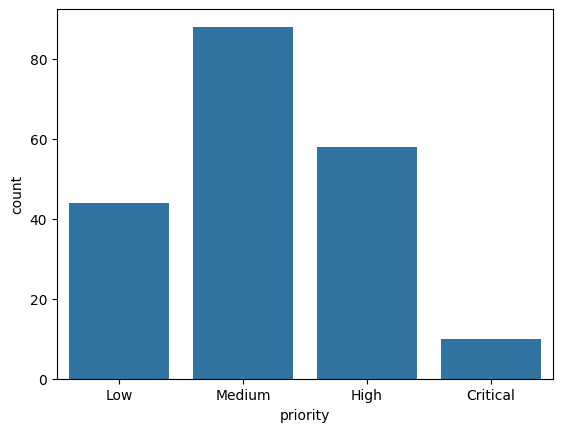

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/task.csv")
print(df.info())
sns.countplot(x="priority", data=df)
plt.show()


In [10]:
# Clean Data and Preprocess Descriptions
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    filtered = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return ' '.join(filtered)


df['cleaned_description'] = df['description'].apply(preprocess)
df[['description', 'cleaned_description']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,description,cleaned_description
0,Study performance metrics,studi perform metric
1,Provide usage documentation,provid usag document
2,Fix crash on launch,fix crash launch
3,Provide usage documentation,provid usag document
4,Fix crash on launch,fix crash launch


In [11]:
# Week 2: Feature Extraction and Classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_description'])
y = df['task_type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report:\n",
      classification_report(y_test, y_pred_nb))

# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Bug       1.00      1.00      1.00         5
     Feature       1.00      1.00      1.00         9
 Improvement       1.00      1.00      1.00         9
    Research       1.00      1.00      1.00         9
     Support       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

SVM Classification Report:
               precision    recall  f1-score   support

         Bug       1.00      1.00      1.00         5
     Feature       1.00      1.00      1.00         9
 Improvement       1.00      1.00      1.00         9
    Research       1.00      1.00      1.00         9
     Support       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg 

In [20]:
# Week 3: Priority Prediction using RandomForest and XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
df_encoded = df.copy()
le_priority = LabelEncoder()
df_encoded['priority_encoded'] = le_priority.fit_transform(df['priority'])

# Features: workload, deadline_days
X = df_encoded[['workload', 'deadline_days']]
y = df_encoded['priority_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))

ModuleNotFoundError: No module named 'xgboost'

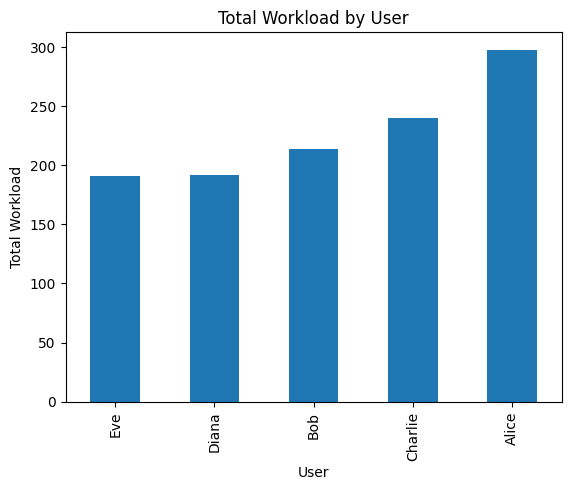

In [21]:
# Week 4: Workload Balancing (Simple Heuristic)
user_workloads = df.groupby('assigned_to')['workload'].sum().sort_values()
user_workloads.plot(kind='bar', title='Total Workload by User')
plt.xlabel('User')
plt.ylabel('Total Workload')
plt.show()